# Interactive explanation of Fourier decomposition of 1D/2D objects in optics

Here some code will be presented to visualise the power of Fourier decomposition in describing the propagating components of light emitted from a 1D or 2D line/surface.

Code is subject to steady improvement

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as mpl
import numpy as np

from scipy.fft import rfft, irfft
%matplotlib inline

We will work here without clear units, length will be given in plain numerics. This is to get some feeling about relations because it is unimportant if one works with radar and wavelength of 3 cm or like in optics with a few hundred nm.

In the following a slider allows to change the k-vector and the corresponding wave with its wavelength are given interactively.

In [22]:
x = np.arange(-10.0,10.0,0.05)

@interact(k=widgets.FloatSlider(min=0.1,max=20.0,step=0.1))
def sineplot(k): 
    fig, ax = mpl.subplots()
    ax.plot(x,np.sin(k*x),label="wavelength = "+str(2*np.pi/k))
    ax.legend(loc=1)

interactive(children=(FloatSlider(value=0.1, description='k', max=20.0, min=0.1), Output()), _dom_classes=('wi…

Here comes the main magic for the sake of simplicity shown in 1D: a plane wave which hits a line under an angle is seen on this line as a 1D wave. Here, depending on wavelength and angle the wavenumber $k$ is calculated:

In [3]:
def angleToK(angle,wavelength):
    return 2*np.pi/wavelength * np.sin(angle*np.pi/180)

In [23]:
@interact(angle=widgets.FloatSlider(min=0.1,max=90,step=0.5,value=45),wavelength=widgets.FloatSlider(min=0.1,max=2,step=0.1,value=1))
def OneDWaveAngle(angle,wavelength):
    kx=angleToK(angle,wavelength)
    ky=angleToK(90-angle,wavelength)
    
    y = np.arange(-2.0,0.0,0.05)
    coords=np.meshgrid(x,y)
    
    waveField = np.sin(kx*coords[0]+ky*coords[1])

    np.meshgrid(x,y)
    
    fig, ax = mpl.subplots()
    fields= ax.pcolor(x,y,waveField)
    
    ax.plot(x,np.sin(kx*x),label="kx = "+str(kx)+"m$^{-1}$")
    
    ax.legend(loc=1)
    
    fig.colorbar(fields)

interactive(children=(FloatSlider(value=45.0, description='angle', max=90.0, min=0.1, step=0.5), FloatSlider(v…

And now we want to calculate, how any object in 1D will be imaged by the wavelength up to a given angle. Therefore, we first define an object. Here a double slit.

In [5]:
def aperture(x,width,pos):
    return np.heaviside(x - pos + width/2,1) * (1 - np.heaviside(x - pos - width/2,1))

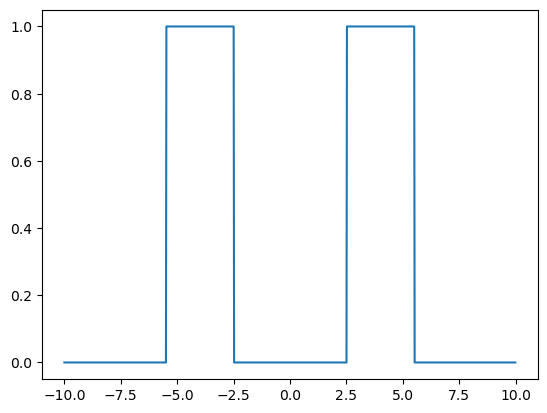

In [6]:
mpl.plot(x,aperture(x,3,-4)+aperture(x,3,4))

Then we calculate via fast fourier transformation the spectrum of the given object:

In [7]:
spectrum = rfft(aperture(x,3,-4)+aperture(x,3,4))

@interact(f_max=widgets.IntSlider(min=1,max=spectrum.size,value=100))
def plotSpec(f_max):
    mpl.plot(np.real(spectrum[0:f_max]))
    mpl.show()

interactive(children=(IntSlider(value=100, description='f_max', max=501, min=1), Output()), _dom_classes=('wid…

And finally we filter the inverse Fourier transformation to be zero from any frequency not included in the range of illumination angles we define:

In [9]:
@interact(angle=(0,90,0.1), wavelength=(0.05,0.5,0.05))
def farFieldNA(angle,wavelength):
    cutSpectrum = np.array(spectrum)
    cutSpectrum[int(angleToK(angle,wavelength)):]=0
    
    fig, ax = mpl.subplots()
    
    ax.plot(x,irfft(cutSpectrum))
    
    mpl.show()

interactive(children=(FloatSlider(value=45.0, description='angle', max=90.0), FloatSlider(value=0.25, descript…

In [17]:
import time
y = np.arange(-2.0,0.0,0.02)
coords=np.meshgrid(x,y)

kx=angleToK(45,0.7)
ky=angleToK(90-45,0.7)

In [18]:
start = time.time()
waveField=np.sin(kx*coords[0]+ky*coords[1])
end = time.time()
print(end - start)


0.0009970664978027344


In [19]:
start = time.time()
for j in y:
    for i in x:
        waveField[np.where(y==j),np.where(x==i)]=np.sin(kx*i+ky*j)
end = time.time()
print(end - start)


0.815295934677124


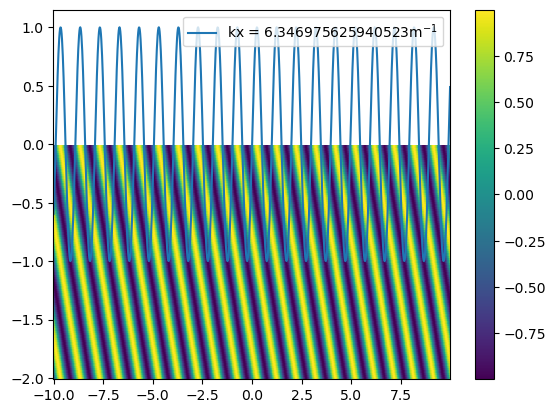

In [16]:
fig, ax = mpl.subplots()
fields= ax.pcolor(x,y,waveField)
    
ax.plot(x,np.sin(kx*x),label="kx = "+str(kx)+"m$^{-1}$")
    
ax.legend(loc=1)
    
fig.colorbar(fields)